In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("./image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

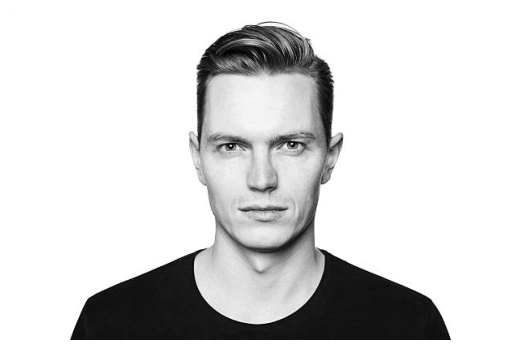

In [21]:
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

### Prewitt Mask

In [35]:
prewitt_x = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_y = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_filter_combined = prewitt_x + prewitt_y

In [36]:
def apply_mask(image, mask):
    filtered_image = np.zeros_like(image)
    height, width = image.shape
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            region = image[i-1:i+2, j-1:j+2]
            value = np.sum(region * mask)
            filtered_image[i, j] = np.clip(value, 0, 255)
    return filtered_image

In [37]:
prewitt_x_image = apply_mask(image, prewitt_x)
prewitt_y_image = apply_mask(image, prewitt_y)
prewitt_filter = prewitt_x_image + prewitt_y_image
prewitt_filter_image = apply_mask(image, prewitt_filter_combined)

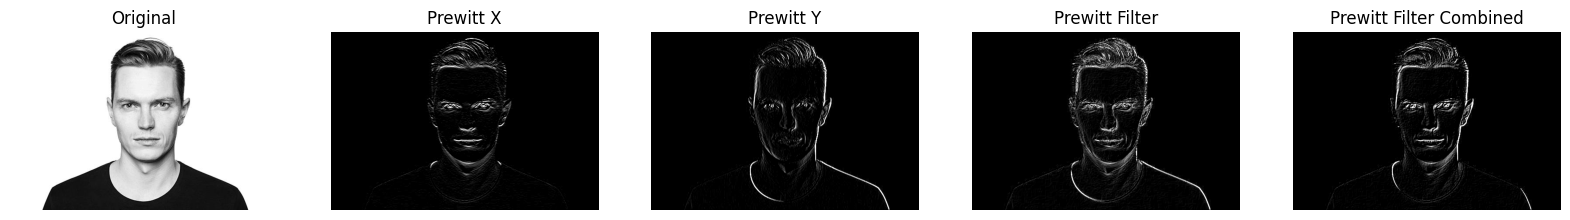

In [44]:
new_images = [image, prewitt_x_image, prewitt_y_image, prewitt_filter, prewitt_filter_image]
titles = ["Original", "Prewitt X", "Prewitt Y", "Prewitt Filter", "Prewitt Filter Combined"]

fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i, ax in enumerate(axes):
    ax.imshow(new_images[i], cmap="gray")
    ax.axis("off")
    ax.set_title(titles[i])

### Sobel Mask

In [45]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_filter_combined = sobel_x + sobel_y

In [46]:
sobel_x_image = apply_mask(image, sobel_x)
sobel_y_image = apply_mask(image, sobel_y)
sobel_filter = sobel_x_image + sobel_y_image
sobel_filter_image = apply_mask(image, sobel_filter_combined)

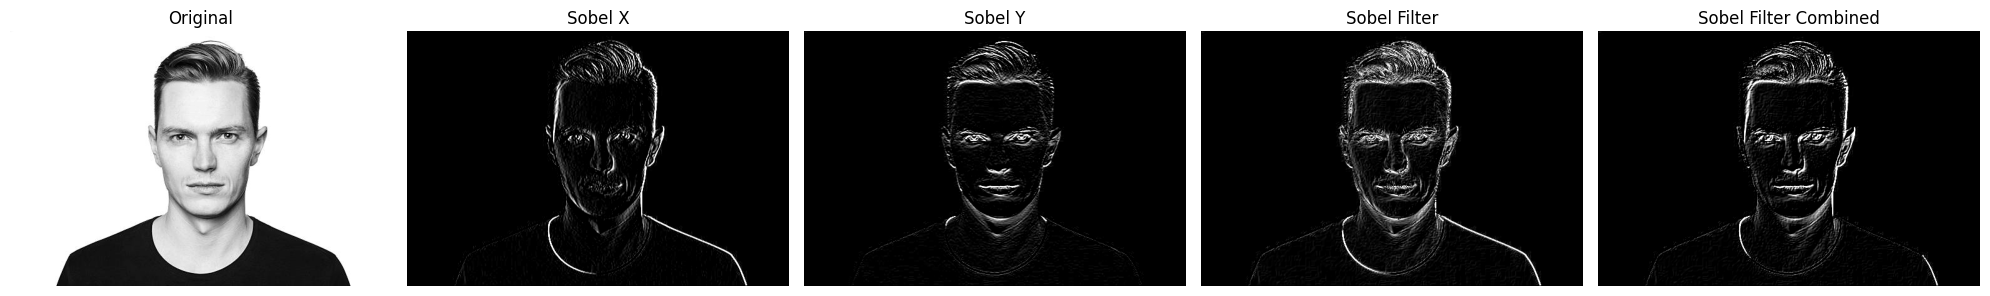

In [51]:
new_sobel_images = [image, sobel_x_image, sobel_y_image, sobel_filter, sobel_filter_image]
sobel_titles = ["Original", "Sobel X", "Sobel Y", "Sobel Filter", "Sobel Filter Combined"]

fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i, ax in enumerate(axes):
    ax.imshow(new_sobel_images[i], cmap="gray")
    ax.axis("off")
    ax.set_title(sobel_titles[i])
plt.tight_layout()

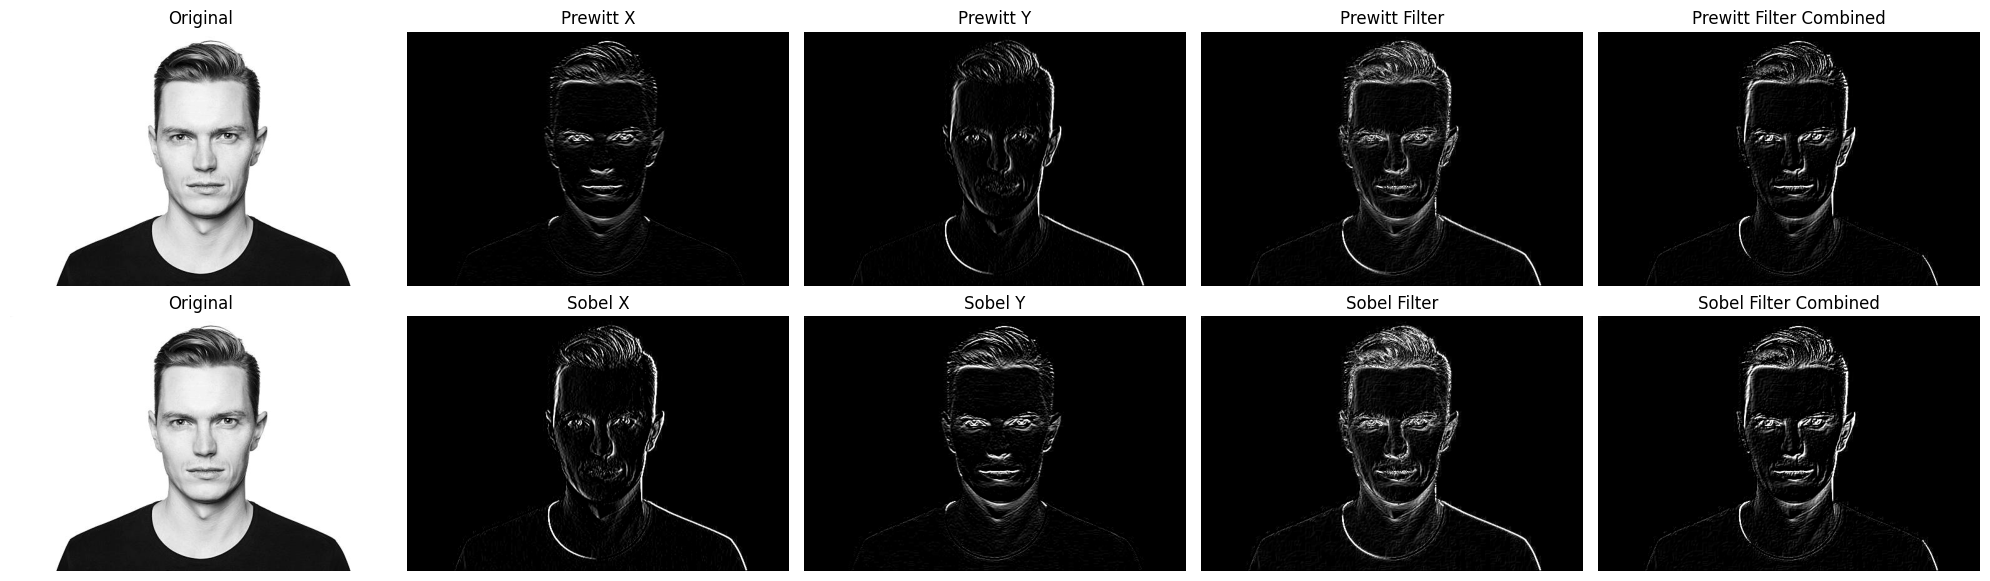

In [53]:
combined_images = new_images + new_sobel_images
combined_titles = titles + sobel_titles

fig, axes = plt.subplots(2, 5, figsize=(20, 6))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(combined_images[i], cmap="gray")
    ax.axis("off")
    ax.set_title(combined_titles[i])

plt.tight_layout()
plt.show()